# FINAL PROJECT: DATA PROGRAMMING IN PYTHON

Load all the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### Question 1
(a) Load the male_stud.csv dataset into Python as a pandas DataFrame.

In [2]:
my_missing = ['NA','NULL','-999','-1'] # Load the values in the list as missing values
male_stud = pd.read_csv("male_stud.csv", na_values = my_missing)

(b) Inspect the data. How many students are included in this dataset? How many diferent indicators are included? Does this dataset contain any missing values?

In [3]:
print(f"The total number of male students whose details were recorded is {male_stud.shape[0]}") # Checks the number of students included in the dataset
print(f"The total number of indicator variables is {male_stud.shape[1]-1}") # Checks the number of indicator variables excluding the target variable
print("The number of missing values in each column")
print(male_stud.isnull().sum()) # Prints the total number of null values in each column
male_stud.head() 

The total number of male students whose details were recorded is 187
The total number of indicator variables is 13
The number of missing values in each column
large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64


,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14


We can visualize the structure of the dataset `male_stud`. It includes the observations for 187 students with 13 indicators. <br>
It can also be observed that there are no null values in any of the variables. <br>
The indicator variables are as follows: <br>


1. large_family
2. lives_in_city
3. traveltime
4. studytime
5. failures
6. paid
7. activities
8. internet
9. romantic
10. famrel
11. freetime
12. goout
13. absences

(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.

### **Numeric Summary**

In [4]:
# For numerical summary of the data
male_stud.describe()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.668449,0.764706,1.491979,1.764706,0.368984,0.390374,0.561497,0.850267,0.283422,4.000000,3.486631,3.197861,5.144385,10.914439
std,0.472034,0.425321,0.750405,0.808713,0.788152,0.489144,0.497536,0.357767,0.451870,0.898027,1.001924,1.135164,5.980749,4.495297
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,9.000000
50%,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,11.000000
75%,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,8.000000,14.000000
max,1.000000,1.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,38.000000,20.000000


### Interpretation

For this task let us mainly focus on numerical variables. <br>

1. absences:

**Mean:** 5.144, indicating an average of approximately 5.14 absences.<br>
**Standard Deviation:** 5.981, indicating variability in the number of absences.<br>
**min:** 0.0000 is the minimum value of absence of a student.<br>
**25%:** 0.0000 is the 25th percentile of the distribution of final grades.<br>
**50%:** 4.0000 is the 50th percentile of the distribution of final grades.<br>
**75%:** 8.0000 is the 75th percentile of the distribution of final grades.<br>
**max:** 38.0000 is the maximum value of absences of a student.<br>
It can be interpreted that there are outliers in the dataset and it is not normally distributed.<br>

2. final_grade:

**Mean:** 10.914, suggesting an average final grade of approximately 10.91.<br>
**Standard Deviation:** 4.495, indicating variability in final grades.<br>
**min:** 0.0000 is the minimum value of grades obtained by a student.<br>
**25%:** 9.0000 is the 25th percentile of the distribution of final grades.<br>
**50%:** 11.0000 is the 50th percentile of the distribution of final grades.<br>
**75%:** 14.0000 is the 75th percentile of the distribution of final grades.<br>
**max:** 20.0000 is the maximum value of grade obtained by a student.<br>

Let us also mention these values for the categorical and binary variables coded as numbers.<br>

1. large_family:

**Mean:** 0.668, indicating that, on average, around 66.8% of students come from large families.<br>
**Standard Deviation:** 0.472, showing the variability in the proportion of students from large families.<br>
**min:** 0.0000 <br>
**25%:** 0.0000<br>
**50%:** 1.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

2. lives_in_city:

**Mean:** 0.765, suggesting that approximately 76.5% of students live in urban areas.<br>
**Standard Deviation:** 0.425, indicating some variability in the distribution of students living in urban areas.<br>
**min:** 0.0000 <br>
**25%:** 1.0000<br>
**50%:** 1.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

3. traveltime:

**Mean:** 1.492, suggesting an average travel time to school of approximately 1.5 units.<br>
**Standard Deviation:** 0.750, indicating variability in travel times among students.<br>
**min:** 1.0000 <br>
**25%:** 1.0000<br>
**50%:** 1.0000<br>
**75%:** 2.0000<br>
**max:** 4.0000<br>

3. studytime:

**Mean:** 1.765, indicating that, on average, students spend approximately 1.77 units of time studying.<br>
**Standard Deviation:** 0.809, showing variability in study times.<br>
**min:** 1.0000 <br>
**25%:** 1.0000<br>
**50%:** 2.0000<br>
**75%:** 2.0000<br>
**max:** 4.0000<br>

4. failures:

**Mean:** 0.369, suggesting an average of 0.37 failures per student.<br>
**Standard Deviation:** 0.788, indicating variability in the number of failures.<br>
**min:** 0.0000 <br>
**25%:** 0.0000<br>
**50%:** 0.0000<br>
**75%:** 0.0000<br>
**max:** 3.0000<br>

5. paid:

**Mean:** 0.390, suggesting that approximately 39.0% of students have extra paid classes within the course.<br>
**Standard Deviation:** 0.489, indicating variability in extra paid classes.<br>
**min:** 0.0000 <br>
**25%:** 0.0000<br>
**50%:** 0.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

6. activities:

**Mean:** 0.561, suggesting that around 56.1% of students participate in extracurricular activities.<br>
**Standard Deviation:** 0.498, indicating variability in extracurricular participation.<br>
**min:** 0.0000 <br>
**25%:** 0.0000<br>
**50%:** 1.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

7. internet:

**Mean:** 0.850, suggesting that approximately 85.0% of students have internet access.<br>
**Standard Deviation:** 0.358, indicating variability in internet access.<br>
**min:** 0.0000 <br>
**25%:** 1.0000<br>
**50%:** 1.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

8. romantic:

**Mean:** 0.283, indicating that around 28.3% of students are in a romantic relationship.<br>
**Standard Deviation:** 0.452, showing variability in romantic relationships.<br>
**min:** 0.0000 <br>
**25%:** 0.0000<br>
**50%:** 0.0000<br>
**75%:** 1.0000<br>
**max:** 1.0000<br>

9. famrel:

**Mean:** 4.000, indicating that, on average, students perceive family relationships as good.<br>
**Standard Deviation:** 0.898, indicating some variability in family relationship perceptions.<br>
**min:** 1.0000 <br>
**25%:** 4.0000<br>
**50%:** 4.0000<br>
**75%:** 5.0000<br>
**max:** 5.0000<br>

10. freetime:

**Mean:** 3.487, suggesting that students, on average, have approximately 3.49 units of free time.<br>
**Standard Deviation:** 1.002, indicating variability in the amount of free time.<br>
**min:** 1.0000 <br>
**25%:** 3.0000<br>
**50%:** 3.0000<br>
**75%:** 4.0000<br>
**max:** 5.0000<br>

11. goout:

**Mean:** 3.198, suggesting that students, on average, go out approximately 3.20 times.<br>
**Standard Deviation:** 1.135, indicating variability in socializing habits.<br>
**min:** 1.0000 <br>
**25%:** 2.0000<br>
**50%:** 3.0000<br>
**75%:** 4.0000<br>
**max:** 5.0000<br>

In [5]:
# Let us look at the correlation matrix of the given dataset to check the variables that affect finalgrade the most
correlation_matrix = male_stud.corr()
correlation_matrix # Prints the correlation matrix

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
large_family,1.000000,-0.096090,-0.068261,0.076218,-0.030680,-0.041838,-0.004285,-0.009023,-0.035989,0.076098,0.058785,0.002683,-0.078172,-0.015975
lives_in_city,-0.096090,1.000000,-0.376538,0.057006,-0.108495,0.107930,-0.007473,0.332538,-0.098732,0.112608,-0.032654,0.018996,0.032449,0.144072
traveltime,-0.068261,-0.376538,1.000000,-0.056282,0.164113,-0.042688,-0.052672,-0.104627,-0.001187,-0.087760,0.001644,0.106013,0.048776,-0.191460
studytime,0.076218,0.057006,-0.056282,1.000000,-0.251064,0.097536,0.169775,0.081979,0.095197,-0.007403,-0.050350,-0.036861,-0.074083,0.176335
failures,-0.030680,-0.108495,0.164113,-0.251064,1.000000,-0.264074,-0.147296,-0.127146,0.067085,0.030384,0.247977,0.278513,0.060493,-0.478148
paid,-0.041838,0.107930,-0.042688,0.097536,-0.264074,1.000000,0.044419,0.151474,0.031869,-0.036718,-0.082541,0.005385,0.138679,0.161976
activities,-0.004285,-0.007473,-0.052672,0.169775,-0.147296,0.044419,1.000000,0.052009,0.101410,0.012033,0.052888,0.030696,0.102697,0.146595
internet,-0.009023,0.332538,-0.104627,0.081979,-0.127146,0.151474,0.052009,1.000000,0.064378,-0.050202,-0.020613,0.033626,0.088050,0.112337
romantic,-0.035989,-0.098732,-0.001187,0.095197,0.067085,0.031869,0.101410,0.064378,1.000000,-0.119241,0.061852,0.078750,0.159842,-0.070047
famrel,0.076098,0.112608,-0.087760,-0.007403,0.030384,-0.036718,0.012033,-0.050202,-0.119241,1.000000,0.173285,-0.026370,-0.067068,0.046613


### Correlation Matrix

We can see that the most correlated variables are <br>

1. internet and lives_in_city (0.3325)
2. traveltime and lives_in_city (-0.3765)
3. failures and studytime (-0.2510)
4. paid and failures (-0.2640)
5. freetime and failures (0.2479)
6. goout and failures (0.2785)
7. goout and absences (0.2285)
8. goout and final_grade (-0.2347)
9. final_grade and failures (-0.4781)

In [6]:
# Let us look at the unique values of each categorical variable in the dataset.
print(male_stud.studytime.unique()) 
print(f'The total number of unique values of Studytime are {len(male_stud.studytime.unique())}') 

print(male_stud.failures.unique())
print(f'The total number of unique values of Failures are {len(male_stud.failures.unique())}')

print(male_stud.famrel.unique())
print(f'The total number of unique values of Family Relations are {len(male_stud.famrel.unique())}')

print(male_stud.goout.unique())
print(f'The total number of unique values of Going out are {len(male_stud.goout.unique())}')

[2 1 3 4]
The total number of unique values of Studytime are 4
[0 3 1 2]
The total number of unique values of Failures are 4
[5 4 3 2 1]
The total number of unique values of Family Relations are 5
[2 4 1 3 5]
The total number of unique values of Going out are 5


In [7]:
print("Value count for studytime")
print(male_stud.studytime.value_counts())

print("Value count for failures")
print(male_stud.failures.value_counts())

print("Value count for famrel")
print(male_stud.famrel.value_counts())

print("Value count for goout")
print(male_stud.goout.value_counts())

Value count for studytime
2    85
1    78
3    14
4    10
Name: studytime, dtype: int64
Value count for failures
0    144
1     27
3     10
2      6
Name: failures, dtype: int64
Value count for famrel
4    88
5    57
3    30
2     9
1     3
Name: famrel, dtype: int64
Value count for goout
3    60
2    47
4    40
5    31
1     9
Name: goout, dtype: int64


In [8]:
# Let us now look at the value count for each binary variable
print("Value count for large_family")
print(male_stud.large_family.value_counts())

print("Value count for lives_in_city")
print(male_stud.lives_in_city.value_counts())

print("Value count for paid")
print(male_stud.paid.value_counts())

print("Value count for activities")
print(male_stud.activities.value_counts())

print("Value count for internet")
print(male_stud.internet.value_counts())

print("Value count for romantic")
print(male_stud.romantic.value_counts())

Value count for large_family
1    125
0     62
Name: large_family, dtype: int64
Value count for lives_in_city
1    143
0     44
Name: lives_in_city, dtype: int64
Value count for paid
0    114
1     73
Name: paid, dtype: int64
Value count for activities
1    105
0     82
Name: activities, dtype: int64
Value count for internet
1    159
0     28
Name: internet, dtype: int64
Value count for romantic
0    134
1     53
Name: romantic, dtype: int64


### **Graphical Summary**

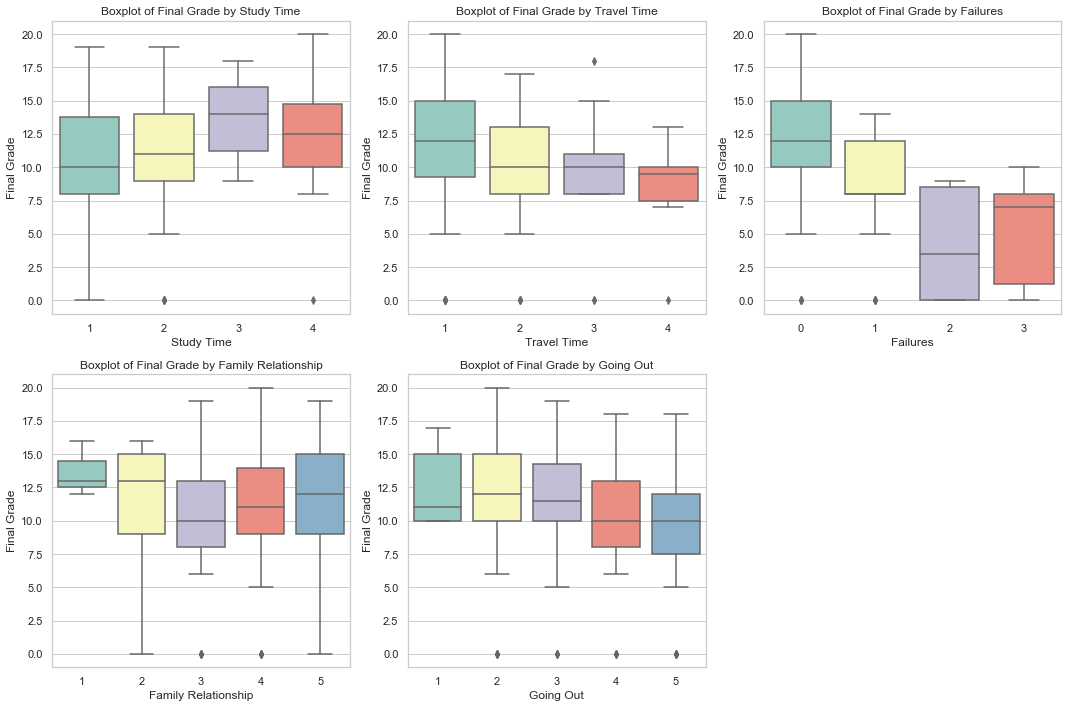

In [9]:
# For graphical summary let us first look at the distribution of various categorical variables with the final grade.
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(15, 10))

# Plot boxplots
plt.subplot(2, 3, 1)
sns.boxplot(x='studytime', y='final_grade', data=male_stud, palette="Set3")
plt.title('Boxplot of Final Grade by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')

plt.subplot(2, 3, 2)
sns.boxplot(x='traveltime', y='final_grade', data=male_stud, palette="Set3")
plt.title('Boxplot of Final Grade by Travel Time')
plt.xlabel('Travel Time')
plt.ylabel('Final Grade')

plt.subplot(2, 3, 3)
sns.boxplot(x='failures', y='final_grade', data=male_stud, palette="Set3")
plt.title('Boxplot of Final Grade by Failures')
plt.xlabel('Failures')
plt.ylabel('Final Grade')

plt.subplot(2, 3, 4)
sns.boxplot(x='famrel', y='final_grade', data=male_stud, palette="Set3")
plt.title('Boxplot of Final Grade by Family Relationship')
plt.xlabel('Family Relationship')
plt.ylabel('Final Grade')

plt.subplot(2, 3, 5)
sns.boxplot(x='goout', y='final_grade', data=male_stud, palette="Set3")
plt.title('Boxplot of Final Grade by Going Out')
plt.xlabel('Going Out')
plt.ylabel('Final Grade')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Boxplot Interpretation

Above is a visual distribution of various categorical variables in terms of final grade of a student. Let us look at the plots one by one. <br>

1. Studytime

1 - less than 2 hours,
2 - 2-5 hours,
3 - 5-10 hours,
4 - more than 10 hours

It can be observed that the distribution of final grades differs for varying studytimes. If we focus on the median values, it appears that it is maximum at 3 when the studytime is between 5-10 hours. It is not perfectly uniform for all the categories, and has some outliers when the studytime is between 2-5 hours or more than 10 hours. Catgory 1 seems to have the highest spread of data.<br>

2. Traveltime 

1 - less than 15 mins,
2 - 15-30 mins,
3 - 30 mins-1 hours,
4 - more than 1 hours

Traveltime affects the final grades distribution in the sense that it is slightly higher for lower values of travel time. The data is not uniformly distributed with outliers present for each category. For example, the minimum value for category 3 seems to be coinciding with the 25th percentile. Catgory 1 seems to have the highest spread of data.<br>

3. Failures

0 - 0 failures,
1 - 1 failures,
2 - 2 failures,
3 - more than or equal to 3 failures

For different values of failures we can observe changes in the final grade values. It is highest for the lowest value of failures. The data is not uniformly distributed which can be clearly visualized by the distribution of each category. For eg. for 1 failures, the meadian is not distinguished. There are also 2 outliers present for 0 and 1 failures. For category 3 most of the distribution is contained within the interquartile range covering 50% of distribution. The maximum spread can be seen in category 0.<br>

4. Family Relationship

1 - very bad, 
2 - bad,
3 - average,
4 - good,
5 - excellent

Theres is no clear pattern here. However, if we were to constarint our search within the value of the median, it can be seen that students with average quality of family relations have a slightly lower final grade. However, looking at the maximum values, the categories 3, 4, and 5 reach the highest final grades. The distribution of each category is not uniform with outliers present in the data. Category 1 seems to cover a very small spread, whereas category 5 has the highest spread.<br>

5. Going Out

1 - very low
2 - low
3 - medium
4 - high
5 - very high

Catgory 2 has the highest median as well as highest maximum value. In this distribution, most of the data seems to have a wide spread. It does not appear to be uniformly distributed. There are outliers present in the data.<br>

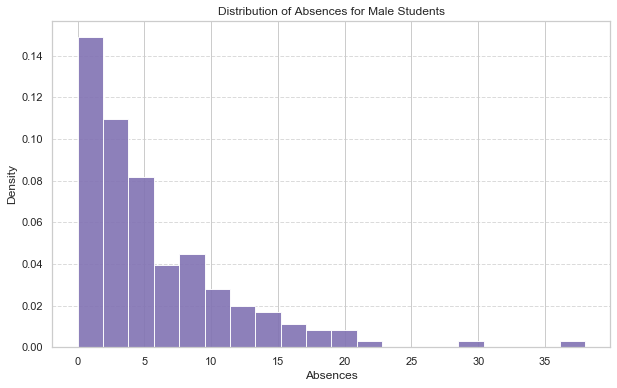

In [10]:
# Now let us look at the distribution of numeric variable by creating a histogram
plt.figure(figsize=(10, 6))

male_stud.absences.hist(bins=20,density=True,color='m',alpha=0.9)

plt.title('Distribution of Absences for Male Students')
plt.xlabel('Absences')
plt.ylabel('Density')
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

We can see that the histogram of absences is positively skewed, i.e. it does not follow a normal distribution. It has a mean at around 5. We can notice some outlier values at 30 and 37.

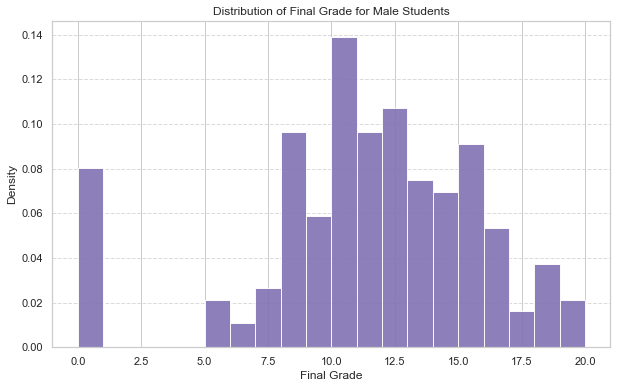

In [11]:
plt.figure(figsize=(10, 6))

male_stud.final_grade.hist(bins=20,density=True,color='m',alpha=0.9)

plt.title('Distribution of Final Grade for Male Students')
plt.xlabel('Final Grade')
plt.ylabel('Density')
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

We can see that the histogram of final grades is not normally distributed. It has a mean at around 10. We can notice some outlier values in the distribution.

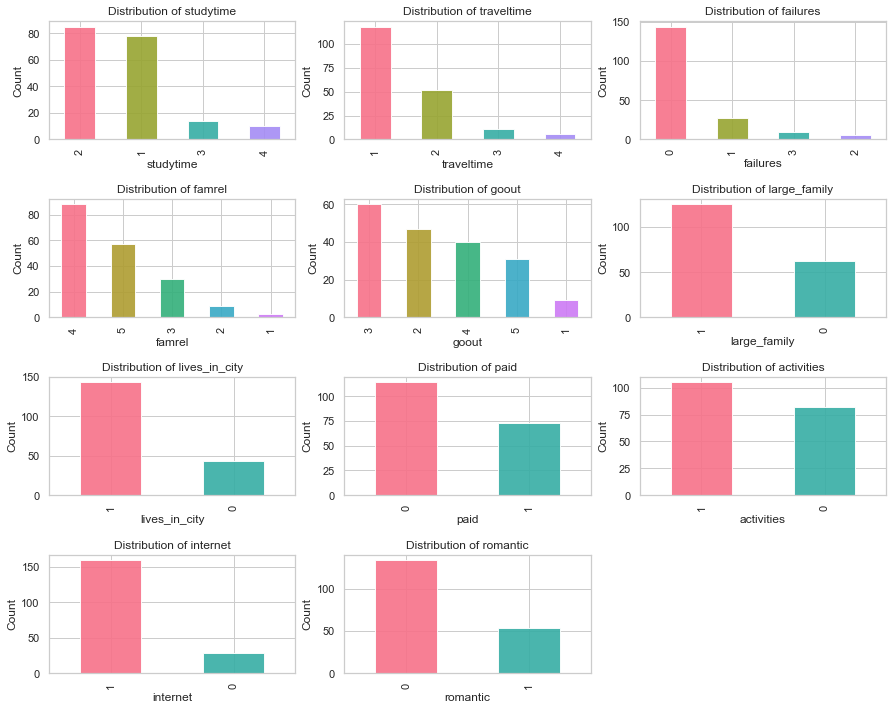

In [12]:
##Let us now visualize the frequency distribution of categorical and binary variables.
## Categorical and binary columns
cat_bin_cols = ['studytime', 'traveltime', 'failures', 'famrel', 'goout', 'large_family', 'lives_in_city', 'paid', 'activities', 'internet', 'romantic']

# Set up the subplot grid
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()

# Loop through each categorical variable
for i, col in enumerate(cat_bin_cols):
    counts = male_stud[col].value_counts()

    # Use a different color for each plot
    colors = sns.color_palette("husl", len(counts))

    # Plot the bar chart
    counts.plot(kind='bar', color=colors, alpha=0.9, ax=axes[i])

    # Set titles and labels
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any remaining empty subplots
for j in range(len(cat_bin_cols), len(axes)):
    fig.delaxes(axes[j])

# Show the plots
plt.show()

We have numerically seen the value counts of different categories in the dataset. We can now visualize it using the code above. 

1. **studytime:**
We can see that most of the data is contained within 1 (<2 hours of study) and 2 (2 to 5 hours of study)<br>

2. **traveltime:** 
We can see that most of the data is contained within 1 (<15 mins of traveltime to school) and 2 (15-30 mins of traveltime to school)<br>

3. **failures:** 
Most of the data is contained in 0 (no students failing in class)<br>

4. **famrel:** 
In quality of family relations, it can be noticed that most of the data is conatined in 5 - excellent, 4 - good, 3 - average quality of family relations.<br>

5. **goout:** 
The distribution of the proportion of students going out with friends is as follows:<br>
3 (medium)> 2 (low) > 4 (high) > 5 (very high) > 1 (very low)<br>

6. **large_family:** 
1 (family size greater than 3) has a higher count that 0 (family size less than or equal to 3), indicating larger families.<br>

7. **lives_in_city:** 
1 (urban area) > 0 (rural area) indicating that most of families live in cities.<br>

8. **paid:** 
0 (no) > 1(yes) indicating that the proportion of students taking extra paid classes within the course subject is lower. <br>

9. **activities:** 
1 (yes) > 0 (no) indicating that more students have taken extra curricular activities.<br>

10. **internet:** 
1 (yes) > 0 (no) indicating that more students have internet access at home as compared to those that do not.<br>

11. **romantic:** 
0 (no) > 1 (yes) indicating that most students are not in a romantic relationship. 

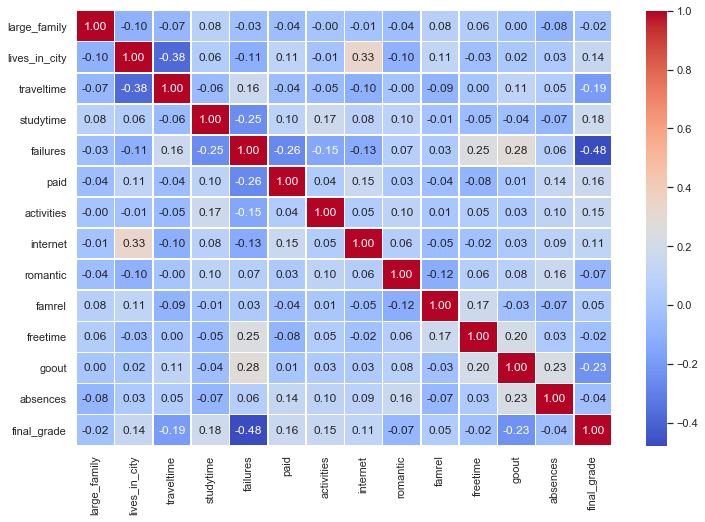

In [13]:
# Let us visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

We have seen the numerical representation of the correlation matrix. We can visualize it here.

### Conclusion

In conclusion, our exploration of the dataset involved a comprehensive analysis using various statistical and visual tools. Here's a breakdown of our findings:

**Descriptive Statistics:**

The describe function provided us with key numerical summaries, including measures of central tendency, spread, and quartiles for each numerical variable in the dataset.
Boxplots were employed to visually represent the distribution of catogorical data, highlighting central tendencies, variability, and the presence of outliers.

**Categorical and Binary Variables:**

We examined the distribution of categorical and binary variables through frequency charts and value counts.
These visualizations allowed us to understand the prevalence of different categories within each variable, providing insights into the dataset's composition.

**Correlation Matrix:**

The correlation matrix provided valuable information on the relationships between numerical variables. High correlation coefficients suggest potential dependencies that can be crucial for model fitting and interpretation.
Understanding correlations helps in avoiding issues like multicollinearity and guides feature selection in predictive modeling.

**Handling Null Values:**

We accounted for null values within the dataset. This process involved identifying the presence of missing data, assessing its extent, and deciding on appropriate strategies for handling or imputing missing values.

In summary, our analysis not only showcased the central tendencies and variability within the dataset but also delved into the relationships between variables. This multi-faceted approach equips us with a comprehensive understanding of the dataset's structure, aiding in subsequent modeling and interpretation efforts. As we move forward, these insights will contribute to making informed decisions regarding data preprocessing, feature engineering, and the selection of appropriate modeling techniques.

### Question 2
(a) Load the female_stud.csv dataset into Python as a pandas DataFrame. 

In [14]:
female_stud = pd.read_csv("female_stud.csv", na_values = my_missing) # Load the female students dataset

In [15]:
female_stud.head()

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10


(b) Inspect the data. How many students are included in this dataset? Are the indicators the same as those in the male group?

In [16]:
print(f"The total number of female students whose details were recorded is {female_stud.shape[0]}")
print(f"The total number of indicator variables is {female_stud.shape[1]-1}")
print("The number of missing values in each column")
print(female_stud.isnull().sum())
female_stud.head()

The total number of female students whose details were recorded is 208
The total number of indicator variables is 13
The number of missing values in each column
large_family     0
lives_in_city    0
traveltime       0
studytime        0
failures         0
paid             0
activities       0
internet         0
romantic         0
famrel           0
freetime         0
goout            0
absences         0
final_grade      0
dtype: int64


,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,1,1,2,2,0,0,0,0,0,4,3,4,6,6
1,1,1,1,2,0,0,0,1,0,5,3,3,4,6
2,0,1,1,2,3,1,0,1,0,4,3,2,10,10
3,1,1,1,3,0,1,1,1,1,3,2,2,2,15
4,1,1,1,2,0,1,0,0,0,4,3,2,4,10


There are a total of 208 students included in this dataset with the same 13 indicator variables as the male students dataset.<br>
There are no null values in any of the columns.

(c) Perform a t-test, for each of the measurements, to test whether any of the indicators differ between the male and the female groups. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.

In [17]:
# Set alpha
alpha = 0.01 # given

columns = male_stud.columns

for col in columns:
    t_stat, p_value = stats.ttest_ind(male_stud[col], female_stud[col]) # equal_var=False)  # Assuming unequal variances
    print(f"\nT-test results for {col}:")
    print(f"T-score: {t_stat}")
    print(f"P-value: {p_value}")


T-test results for large_family:
T-score: -1.7886773632900528
P-value: 0.07443689700483698

T-test results for lives_in_city:
T-score: -0.5653036030213555
P-value: 0.5721898495135425

T-test results for traveltime:
T-score: 1.1860551557953753
P-value: 0.2363170824741324

T-test results for studytime:
T-score: -6.378011403261443
P-value: 5.045044371289513e-10

T-test results for failures:
T-score: 0.8817780076175071
P-value: 0.37843584788424967

T-test results for paid:
T-score: -2.58142674087509
P-value: 0.010200689886658792

T-test results for activities:
T-score: 1.989052552579219
P-value: 0.0473883165761214

T-test results for internet:
T-score: 0.8753563404920145
P-value: 0.38191471671030264

T-test results for romantic:
T-score: -2.0331361835287765
P-value: 0.04271031909944724

T-test results for famrel:
T-score: 1.1710913475656488
P-value: 0.24227162046982076

T-test results for freetime:
T-score: 4.873860224579705
P-value: 1.5907052125259316e-06

T-test results for goout:
T-sco

From the output above, we can see that the p-value for most of the variables is greater than alpha, which implies that these indicators from the 2 datasets are similar. <br>

However, for 2 variables the p-value is smaller than alpha.<br>
1. studytime - 5.045044371289513e-10
2. freetime - 1.5907052125259316e-06

Indicating that these 2 indicators from the 2 datasets are not similar.


**Reasoning**: When a ttest is performed with a significance level alpha, we check for the p-value. If the p-value is greater than alpha we conclude that the 2 samples provided come from the same dataset and there is no or little disparity between the 2, based on the p-value. However, if the p-value turns out to be less than alpha, we conclude that the indicators do not come from the same dataset and have a certain level of disparity between them. 

### Question 3
(a) Combine the two datasets into a single DataFrame.

In [18]:
students = pd.concat([male_stud,female_stud])
students

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade
0,0,1,1,2,0,1,1,1,0,5,4,2,10,15
1,0,1,1,2,0,0,0,1,0,4,4,4,0,11
2,0,1,1,2,0,1,0,1,0,4,2,2,0,19
3,1,1,1,2,0,1,1,1,0,5,5,1,0,15
4,0,1,1,1,0,1,1,1,0,4,3,3,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,0,2,3,0,1,0,0,0,5,3,3,2,10
204,1,0,3,1,0,1,1,1,1,4,4,3,7,6
205,1,0,1,3,1,0,1,1,0,5,4,2,0,0
206,0,1,1,2,0,1,0,1,0,4,3,4,0,8


(b) Compute the Pearson correlation coeffcient between each of the measurements and identify which indicators are most correlated. List the four most strongly correlated pairs

In [19]:
# We already have the columns stored in the columns variable from the ttest done above.

column_names = ['column1','column2','correlation','pvalue']
correlation_pairs = pd.DataFrame(columns=column_names) # To store the columns and their corresponding correlation and p-value

for i in columns: # The columns variable is the list declared for ttest above which excludes the target variable
    for j in columns:
        if(i != j): # When the 2 columns are not the same find their pearsonr coefficient
            corr_coeff, p_value = stats.pearsonr(students[i], students[j])  # Assuming unequal variances
            correlation_pairs = correlation_pairs.append({
                'column1': i,
                'column2': j,
                'correlation': corr_coeff,
                'pvalue': p_value
            }, ignore_index=True)

# Get the absolute value of correlation between 2 indicator variables
correlation_pairs.correlation = abs(correlation_pairs.correlation) 
# Sort the correlation_pairs dataframe based on absolute value of correlation
correlation_pairs = correlation_pairs.sort_values(by='correlation', ascending=False) 
correlation_pairs = correlation_pairs.reset_index(drop=True)
correlation_pairs
print("\nTop 4 most correlated pairs:")
print(correlation_pairs.head(8))


Top 4 most correlated pairs:
         column1        column2  correlation        pvalue
0    final_grade       failures     0.360415  1.465663e-13
1       failures    final_grade     0.360415  1.465663e-13
2  lives_in_city     traveltime     0.328096  2.292331e-11
3     traveltime  lives_in_city     0.328096  2.292331e-11
4       freetime          goout     0.285019  8.082602e-09
5          goout       freetime     0.285019  8.082602e-09
6  lives_in_city       internet     0.216842  1.374850e-05
7       internet  lives_in_city     0.216842  1.374850e-05


We can see that the top 4 most correlated variable pairs are: <br>

1. final_grade and failures
2. lives_in_city and travel_time
3. freetime and goout
4. internet and lives_in_city

(c) Create scatter plots for the each of the correlated pairs identified in Q3(b). Are the relationships as expected from the correlation coeffcients?

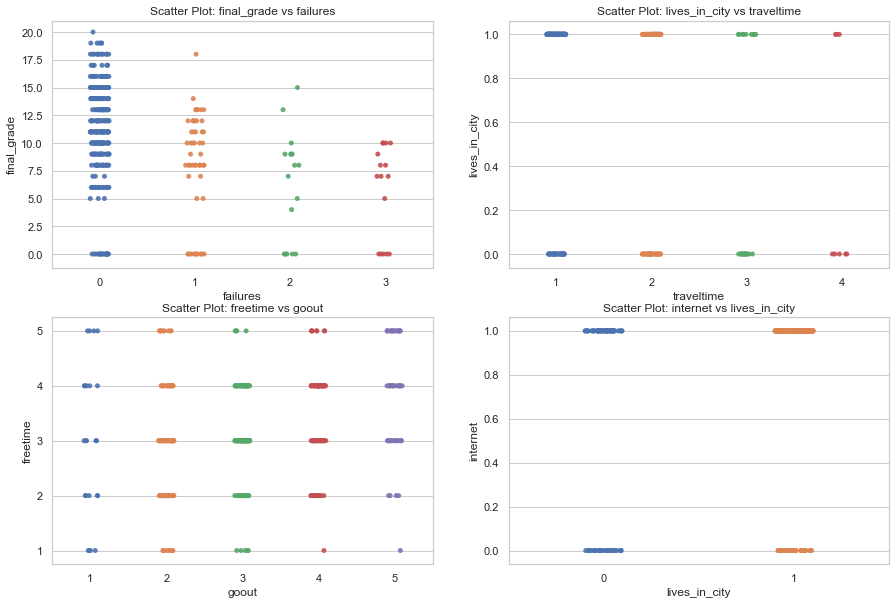

In [20]:
# Let us plot the top 4 most correlated pairs to visualize their correlation
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.stripplot(data=students, x=students.failures, y=students.final_grade, jitter = True, alpha = 0.9)
plt.title(f'Scatter Plot: final_grade vs failures')
plt.xlabel('failures')
plt.ylabel('final_grade')

plt.subplot(2,2,2)
sns.stripplot(data=students, x=students.traveltime, y=students.lives_in_city, jitter = True, alpha = 0.9)
plt.title(f'Scatter Plot: lives_in_city vs traveltime')
plt.xlabel('traveltime')
plt.ylabel('lives_in_city')
#plt.show()

plt.subplot(2,2,3)
sns.stripplot(data=students, x=students.goout, y=students.freetime, jitter = True, alpha = 0.9)
plt.title(f'Scatter Plot: freetime vs goout')
plt.xlabel('goout')
plt.ylabel('freetime')

plt.subplot(2,2,4)
sns.stripplot(data=students, x=students.lives_in_city, y=students.internet, jitter = True, alpha = 0.9)
plt.title(f'Scatter Plot: internet vs lives_in_city')
plt.xlabel('lives_in_city')
plt.ylabel('internet')

plt.show()

1. **final_grade vs failures**<br>

The correlation coefficient between final_grade and failures is 0.3604 indicating a 36% correlation between the 2. It can be seen from the plot above that final_grade is somewhat affected by change in the value of failures wherein when failures are 0, the final grade reaches the highest value and gradually decreases for increase in the failures level.

2. **lives_in_city vs trveltime**<br>

The correlation coefficient between lives_in_city and traveltime is 0.3281 indicating a 32% correlation between the 2. It can be seen from the plot above that they are slightly governed by internal changes, i.e we can see the difference in the value of lives_in_city for different values of traveltime. 

3. **freetime vs goout**<br>

The correlation coefficient between freetime and goout is only 0.2850 indicating a 28% correlation between the 2. It can be seen from the plot above that they are slightly governed by internal changes, i.e we can see the difference in the value of freetime for different values of goout.

4. **internet vs lives_in_city**<br>

The correlation coefficient between freetime and goout is only 0.2168 indicating a 21% correlation between the 2. It can be seen from the plot above that they are slightly governed by internal changes, i.e we can see the difference in the value of internet for whether the student lives in city or not.<br>

Though these variables are the highest correlated pairs of indicators, we can see that the correlation values are really small in all cases, indicating that changes in one variable govern the chnages in the other only by a small fraction. Thus, it is only slightly visible in the graphical representation. 

### Question 4
Logistic regression to predict students failure. <br>

(a) In the Portuguese system a grade from 0 to 9.5 is considered as a FAIL, while grades from 10 to 20 are considered PASS. Create a new column in the dataframe indicating whether the student passed or failed. Use this column as dependent variable for the regression task in the following items (Remaining indicators except for the final grade have to be used as predictor
variables).

In [21]:
students['pass_fail'] = np.where(students['final_grade'] >= 10, 1, 0) # Create the column pass_fail
# 1 signifies PASS
# 0 signifies FAIL
print(sum(students['pass_fail']==1)) # Number of students passed
print(sum(students['pass_fail']==0)) # Number of students failed

265
130


In [22]:
students.tail(10)

,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences,final_grade,pass_fail
198,1,0,4,3,0,0,0,1,0,4,3,2,2,10,1
199,1,1,2,3,2,1,0,1,1,5,4,3,4,15,1
200,0,0,1,2,0,1,1,1,0,5,4,3,4,10,1
201,1,1,1,2,0,1,0,1,1,4,1,3,0,15,1
202,1,0,1,2,0,1,1,1,0,4,5,4,17,10,1
203,1,0,2,3,0,1,0,0,0,5,3,3,2,10,1
204,1,0,3,1,0,1,1,1,1,4,4,3,7,6,0
205,1,0,1,3,1,0,1,1,0,5,4,2,0,0,0
206,0,1,1,2,0,1,0,1,0,4,3,4,0,8,0
207,1,1,2,2,1,0,1,0,0,1,1,1,0,0,0


(b) Separate the data into response and predictor variables and standardise the predictor variables. 

In [23]:
# Predictor variables
X = students.drop(['final_grade','pass_fail'],axis=1)
X_std = (X-X.mean())/X.std()
# Add intercept
X_std.insert(0,'intercept',1)

# Target variable
y = students.pass_fail 

In [24]:
X_std.head()

,intercept,large_family,lives_in_city,traveltime,studytime,failures,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,1,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,1.085968,0.981188,0.447325,-0.707552,1.177367,0.765428,-0.996032,0.536185
1,1,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,-0.918506,-1.016592,0.447325,-0.707552,0.062115,0.765428,0.800464,-0.713332
2,1,-1.568015,0.534714,-0.642435,-0.042232,-0.449374,1.085968,-1.016592,0.447325,-0.707552,0.062115,-1.236851,-0.996032,-0.713332
3,1,0.636134,0.534714,-0.642435,-0.042232,-0.449374,1.085968,0.981188,0.447325,-0.707552,1.177367,1.766567,-1.894280,-0.713332
4,1,-1.568015,0.534714,-0.642435,-1.233786,-0.449374,1.085968,0.981188,0.447325,-0.707552,0.062115,-0.235711,-0.097784,-0.463428


(c) Fit a logistic regression model and interpret the fitted model.

In [25]:
logit1 = sm.Logit(y, X_std).fit() # Fit the logistic regression model
print(logit1.summary())

Optimization terminated successfully.
         Current function value: 0.556201
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              pass_fail   No. Observations:                  395
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                           13
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.1221
Time:                        12:15:50   Log-Likelihood:                -219.70
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.330e-08
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.7801      0.118      6.602      0.000       0.548       1.012
large_family     -0.

We have fit a logstic regression model to predict the pass_fail variable by the use of other indicator variables. Let us now interpret the model we have fitted above. Let us focus on the following <br>

1. coefficients
2. P>|z|
3. Pseudo R squared
4. Log likelighood

1. **coefficients**<br>

The coefficient are associated to every variable used for fitting the model, indicating the change in the log-odds of passing for a one-unit change in the predictor variable.

2. **p-value (P>|z|)**<br>

The p-value is an indicator of accepting or rejecting the null-hypothesis at a signifinace level alpha. Let us assume alpha = 0.05. The null hypothesis is that the coefficient associated to a particular variable is equal to zero. And the alternative hypothesis is that the coefficient is not equal to zero. We look at the p-value to see if p < alpha then the null hypothesis is rejected indicating that the variable is of significance in model prediction, otherwise the null hypothesis is accepted indicating that the variable does not add importance to the model. 

3. **Pseudo R-squared**<br>

The Pseudo R-squared is a measure of how well the model explains the variability in the dependent variable compared to a null model. In this case, the Pseudo R-squared is 0.1221, suggesting that the model explains about 12.21% of the variability in pass_fail.

4. **Log likelihood**<br>

The log-likelihood is a measure of how well the model explains the observed data. A lower log-likelihood indicates a better-fitting model.

Let us first look at the p-value associated to every variable to identify the variables of importance to us. <br>

We can see that the following variables have a p-value less than the assumed alpha.<br>

1. intercept (0.000)
2. failures (0.000)
3. goout (0.001)

Now that we have identified the most important features, let us interpret their coefficients. <br>

1. **intercept**<br>

Intercept: 0.7801 <br>
Interpretation: When all other predictor variables are zero, the log-odds of passing is 0.7801.<br>

2. **failures**<br>

Coefficient: -0.6692<br>
Interpretation: Holding other variables constant, a one-unit increase in the number of failures is associated with a decrease of 0.6692 in the log-odds of passing.<br>

3. **goout**<br>

Coefficient: -0.4254<br>
Interpretation: Holding other variables constant, a one-unit increase in the variable goout is associated with a decrease of 0.4254 in the log-odds of passing.<br>

(d) Perform forward selection for your regression model using the Akaike Information Criterion (AIC). Examine the selected model and discuss your findings in relation to the model fitted in part (b).

In [26]:
def forward_selection(X, y, criterion='AIC'):
    selected_features = [] # Features that reduce the aic
    left_features = list(X.columns) # remaining features
    best_aic = np.inf # set the worst value of aic

    while True:
        aic_values = [] # store aic values
        for feature in left_features: # Add a feature one by one
            model = sm.Logit(y, X[selected_features + [feature]]) # fit the model with the selected features + 1 feature
            result = model.fit(disp=False)
            aic = result.aic
            aic_values.append((feature, aic)) # Update the aic values

        aic_values.sort(key=lambda x: x[1])
        best_feature, best_feature_aic = aic_values[0] # Get the best aic value and the corresponding feature from the list

        if best_feature_aic < best_aic: # If the new aic value is less than the best aic value
            selected_features.append(best_feature) # Add the new feature into the selected features
            left_features.remove(best_feature) # Remove the added feature from the remaining features
            best_aic = best_feature_aic # Update the best aic value
        else: # If the new aic did not reduce the best aic, exit the loop and fit the final model
            break

    final_model = sm.Logit(y,X[selected_features]) # Fit the final model
    result = final_model.fit()
    
    return result, selected_features

# Perform forward selection
result_forward, selected_features_forward = forward_selection(X_std, y)

Optimization terminated successfully.
         Current function value: 0.566845
         Iterations 5


In [27]:
print("Selected Features:", selected_features_forward)
print(result_forward.summary()) 

Selected Features: ['intercept', 'failures', 'goout']
                           Logit Regression Results                           
Dep. Variable:              pass_fail   No. Observations:                  395
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Dec 2023   Pseudo R-squ.:                  0.1053
Time:                        12:16:01   Log-Likelihood:                -223.90
converged:                       True   LL-Null:                       -250.25
Covariance Type:            nonrobust   LLR p-value:                 3.606e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7530      0.116      6.504      0.000       0.526       0.980
failures      -0.7187      0.129     -5.587      0.000      -0.971      -0.46

The second logistic regression model was built using a forward selection approach based on the Akaike Information Criterion (AIC). The selected features for this model are 'intercept', 'failures', and 'goout'.<br>

Let's examine and compare this model with the original model:<br>

**Original Model:**<br>
Features: Intercept, large_family, lives_in_city, traveltime, studytime, failures, paid, activities, internet, romantic, famrel, freetime, goout, absences<br>
Pseudo R-squared: 0.1221<br>

Key Findings:<br>
Multiple features were included in the model.<br>
Some features had statistically significant coefficients.<br>
Pseudo R-squared was 0.1221, indicating a moderate explanatory power.<br>

**Forward Selection Model:**<br>
Features: Intercept, failures, goout<br>
Pseudo R-squared: 0.1053<br>

Key Findings:<br>
A reduced set of features: 'failures' and 'goout' along with the intercept.<br>
Both selected features have statistically significant coefficients.<br>
Pseudo R-squared is 0.1053, indicating a slightly lower explanatory power compared to the original model.<br>

**Comparison and Discussion:**<br>

**Feature Reduction:**<br>

The forward selection model has a more parsimonious set of features, suggesting that 'large_family', 'lives_in_city', 'traveltime', 'studytime', 'paid', 'activities', 'internet', 'romantic', 'famrel', 'freetime', and 'absences' may not significantly contribute to explaining the variability in the dependent variable which can be seen in their p-values in the original model.<br>

**Statistical Significance:**<br>

Here, 'intercept', 'failures', and 'goout' in the forward selection model have statistically significant coefficients, indicating that they are associated with the log-odds of passing.<br>

**Pseudo R-squared:**<br>

The Pseudo R-squared in the forward selection model is slightly lower, suggesting that the reduced set of features explains a slightly smaller proportion of the variability in the dependent variable compared to the original model.<br>

Interpretation:<br>

In the forward selection model, 'failures' and 'goout' are negatively associated with the log-odds of passing. Specifically, an increase in the number of failures ('failures') and going out more frequently ('goout') are associated with a decrease in the log-odds of passing.<br>

**Model Comparison:**<br>

The original model may provide a more comprehensive understanding of the relationships, while the forward selection model is more parsimonious.<br>

**AIC Criterion:**<br>

The forward selection model was chosen based on the AIC, which balances model fit and complexity. The selected model minimizes the AIC among the candidate models.<br>

In summary, the forward selection model with 'intercept', 'failures', and 'goout' is a simpler model that still captures important relationships. The decision to use one model over the other should consider the balance between explanatory power and model simplicity based on the specific objectives of the analysis.<br>

### Question 5

The original (without the additional column created for question 4) non-standardised dataset should be used for all subsequent questions.

Random forest regression to predict the final grade of a student.<br>
*(Remaining indicators to be used as predictor variables.)*<br>

(a) Split the data into appropriate training and test sets.

In [28]:
# Let us get the original dataset by removing the pass_fail column
original_data = students.drop(['pass_fail'], axis = 1)

# Create the X (indicator) and y (target) variables
X_raw = original_data.drop(['final_grade'],axis=1) # The original non-standardized data (indicators)
y_raw = original_data.final_grade # Target variable

# We will split the data into training and test sets by 75% and 25% respectively.
train_size = np.floor(0.75*X_raw.shape[0]).astype(int) 
np.random.seed(123)
train_select = np.random.permutation(range(len(y_raw)))
X_train = X_raw.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X_raw.iloc[train_select[train_size:],:].reset_index(drop=True)
y_train = y_raw.iloc[train_select[:train_size]].reset_index(drop=True)
y_test = y_raw.iloc[train_select[train_size:]].reset_index(drop=True) 

(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random_state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the final grade of a student. Discuss your findings in relation to the logistic models fit in question 4.

In [29]:
# Fit the Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=10,random_state = 101)
rf.fit(X_train, y_train)

# To get the importance of features used in the model, we use the feature_importances_ method
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({
   'Feature': X_train.columns,
   'Importance': feature_importances
})
importance_df

,Feature,Importance
0,large_family,0.030479
1,lives_in_city,0.039234
2,traveltime,0.080273
3,studytime,0.081641
4,failures,0.129695
5,paid,0.047969
6,activities,0.037251
7,internet,0.039740
8,romantic,0.044868
9,famrel,0.075819


### Comparison

Random forest regression provides insights into the importance of each feature for predicting the final grade, which might differ from the logistic models that were focused on predicting pass/fail.<br>

**Interpretation:**<br>

The feature importances from the random forest model indicate the relative importance of each variable in predicting the final grade. Higher importance values suggest a stronger influence on the predicted outcome.<br>

**Variable Importance:**<br>

**Logistic Model:** 'intercept', 'failures', and 'goout'.<br>
**Random Forest:** 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', and 'absences'.<br>

**Model Selection:**<br>
Logistic regression is commonly used for binary classification, while random forests can handle both regression and classification tasks and capture complex relationships.<br>

**Considerations:**<br>

Random forests can capture non-linear relationships and interactions between variables, which might be missed by logistic regression.<br>
Interpretability might differ between the two approaches, with logistic regression providing coefficients and odds ratios, while random forests provide feature importances.<br>

(c) Use the random forest regression model to predict the final grade of a student for the test set. Create a scatter plot of the true final grade versus the predicted one. Interpret your plot

19.732020202020195


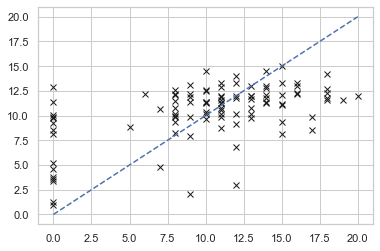

In [30]:
## Predict the test results
rf_test_pred = rf.predict(X_test)
## Calculate the RSS value for checking the accuracy of the model
RSS_rf = np.mean(pow((rf_test_pred - y_test),2)) 
print(RSS_rf)

# Plot the predicted values against the true values
fig = plt.figure()
plt.plot(y_test,rf_test_pred,'kx')
plt.plot([0,20], [0,20], ls="--")

Based on the obtained results, it is evident that the model's predictive accuracy is limited, reaching only 19%. This observation is visually confirmed through the graph, where the data points exhibit a notable deviation from a perfect linear relationship. The model struggles to explain the majority of data points, as only a select few align with the predicted values.<br>

In conclusion, the graph serves as a visual testament to the model's inherent limitations, emphasizing the need for more sophisticated modeling techniques or a deeper exploration of the dataset to enhance predictive performance and uncover more nuanced patterns within the data.<br>

(d) Assess the performance of a random forest regression model with 5, 10, 50, 100, 500, 1000, and 5000 trees in predicting the final grade of a student. You should repeat the model fit and prediction 20 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for
the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.

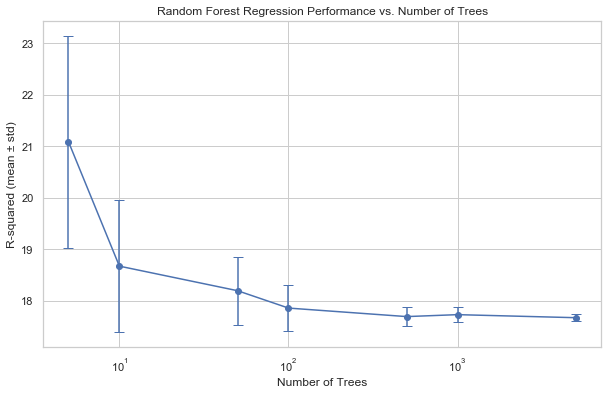

In [31]:
# Number of trees to evaluate
num_trees_list = [5, 10, 50, 100, 500, 1000, 5000]

# Store mean and standard error for each number of trees
mean_scores = []
std_scores = []

for num_trees in num_trees_list:
    rf_scores = []
    for i in range(20): # Repeat the model fit and predict 20 times for each number of trees with different random states
        rf_model = RandomForestRegressor(n_estimators=num_trees, random_state=np.random.randint(100))
        rf_model.fit(X_train,y_train)
        rf_test_pred = rf_model.predict(X_test)
        RSS_rf = np.mean(pow((rf_test_pred- y_test),2))
        rf_scores.append(RSS_rf)

    mean_scores.append(np.mean(rf_scores)) # Update the mean scores
    std_scores.append(np.std(rf_scores)) # Update the standard deviation of scores

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(num_trees_list, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Number of Trees')
plt.ylabel('R-squared (mean ± std)')
plt.title('Random Forest Regression Performance vs. Number of Trees')
plt.show()

### Discussion of the Model Performance for variable trees

The above code runs the Random Forest Regression model for different number of trees with different random states for the 20 interations corresponding to each tree. For this process we have fit the model and predicted the results 20 times for every tree calculating the R-square in each case. We then store the mean and standard deviation of the performance of the model for each trre. Finally we plot the mean model accuracy and standard deviation against the number of trees.<br>

From the above graph we can see that as we increase the number of trees, the mean accuracy decreases indicating that increasing the number of trees after 5 does not improve the model performance. We can also notice that with increasing number of trees, the standard deviation interval becomes smaller. <br>

The decrease in mean accuracy as the number of trees increases might also indicate a potential issue with overfitting. Random Forests are known for their ability to capture complex relationships in data, but a very large number of trees can lead to overfitting on the training data, causing a decrease in generalization performance.<br>

The reduction in the standard deviation interval with an increasing number of trees is a positive observation. It implies that the predictions become more consistent and less sensitive to changes in the random state or the specific data used for training. A smaller standard deviation suggests greater stability in the model's performance.<br>

(e) Explain the rationale for fitting the model multiple times with different random states

Fitting the model multiple times with different random states serves several important purposes:

**Assessing Robustness and Variability:**

By fitting the model with different random states, we account for the variability introduced by the initial randomness in the data splitting, model initialization, and other stochastic processes. This helps assess how sensitive our model is to different configurations.<br>

**Model Initialization (Random Forests):**

Random Forests introduce randomness through bootstrapping and feature selection. Running the model with different random states creates diverse trees, capturing different aspects of the data. This process helps in understanding the robustness of the model to different tree compositions.

**Stochastic Elements in the Algorithm:**

Random Forests, and other algorithms, may have additional sources of randomness (e.g., feature selection order, tie-breaking rules). Fitting the model with different random states offers a more comprehensive understanding of how these stochastic elements influence the model outcomes.

**Reducing Overfitting:**

The observation of decreasing mean accuracy with an increasing number of trees suggests a potential issue with overfitting. Fitting the model multiple times helps identify the point at which adding more trees becomes counterproductive, leading to a decline in generalization performance. This helps overcome the proble, of overfitting.

**Robustness of Results:**

Computing the mean and standard deviation of model performance over multiple runs provides a more stable and reliable estimate. It minimizes the impact of outliers or extreme cases, offering a clearer picture of the model's typical behavior.

In summary, fitting the model with different random states helps capture the inherent variability in the modeling process, leading to a more reliable assessment of the model's generalization performance. It allows us to identify trends, assess robustness, and understand the impact of different sources of randomness on your model.

### Question 6

(a) Perform a k-means cluster analysis, using the indicators as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.

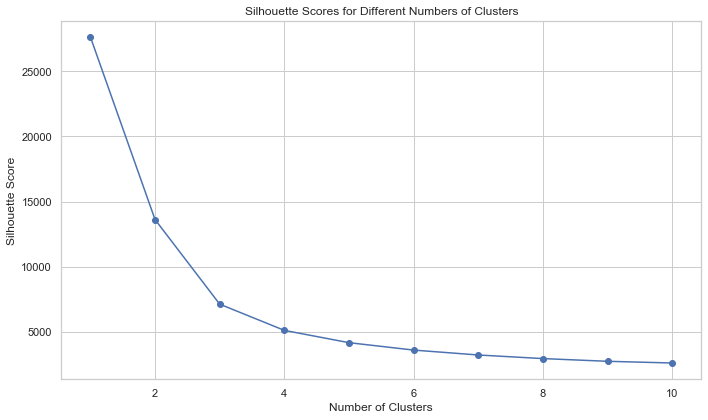

In [32]:
# We will use X_raw created for this task previously, which contains the indicators from the original non-standardized data
inertia_scores = [] # List to store the inertia scores

for i in range(1, 11):  
    clustering_model = KMeans(n_clusters=i, random_state=110)
    clustering_model.fit(X_raw)
    inertia = clustering_model.inertia_ # Inertia scores are calculated
    inertia_scores.append(inertia)
    

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

The optimal number of clusters can be interpreted from the elbow method above. We look for the elbow method where the decrease in the cost function (inertia) slows down.This stability in the decrease of inertia indicates that adding more clusters at this point does not substantially improve the process of capturin the data's structure. In our case, we can see a clear elbow point at 4, indicating that 4 is the optimal number of clusters for this dataset.

(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables. (Hint: Create histograms for each variable, with the data separated by cluster.)

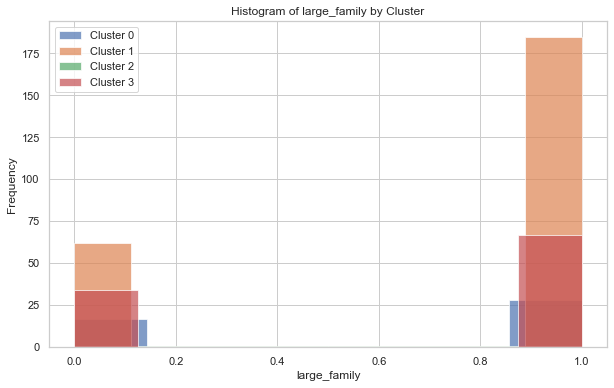

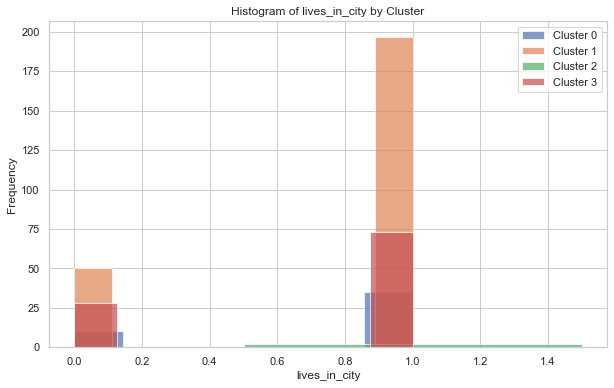

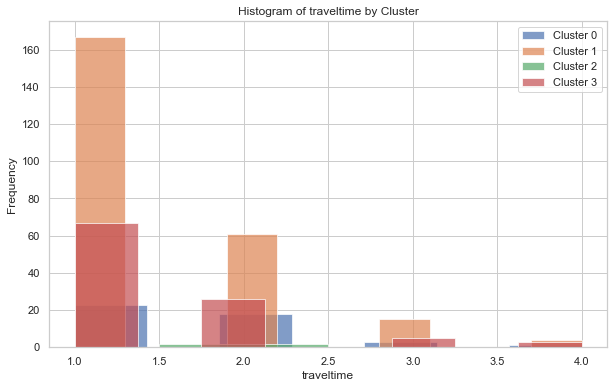

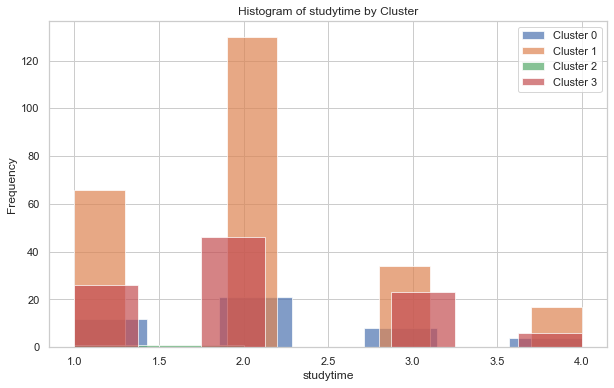

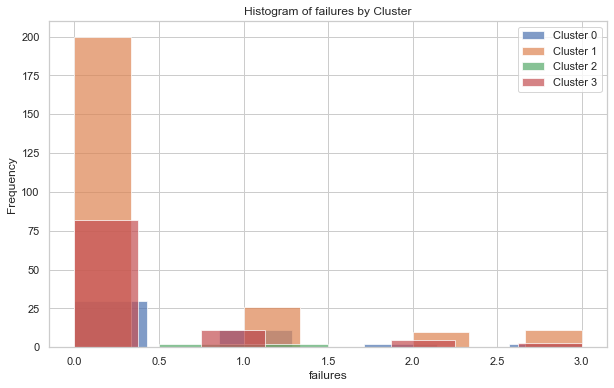

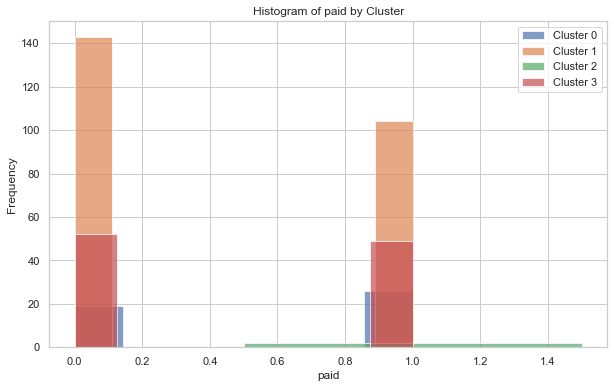

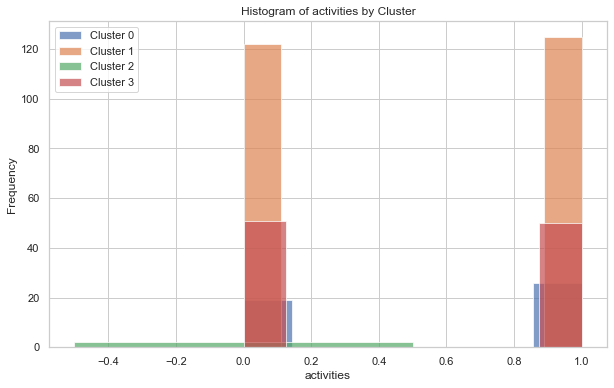

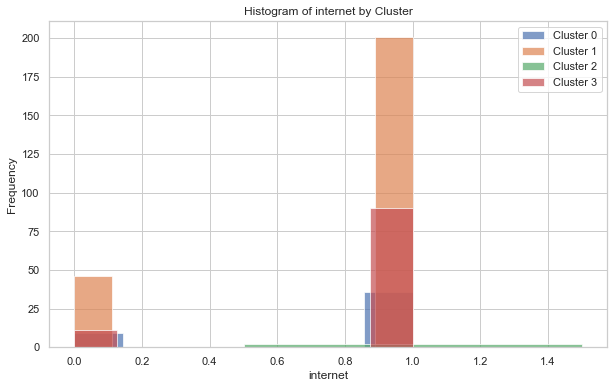

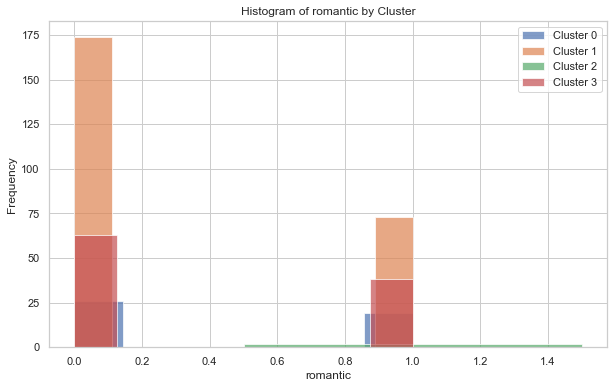

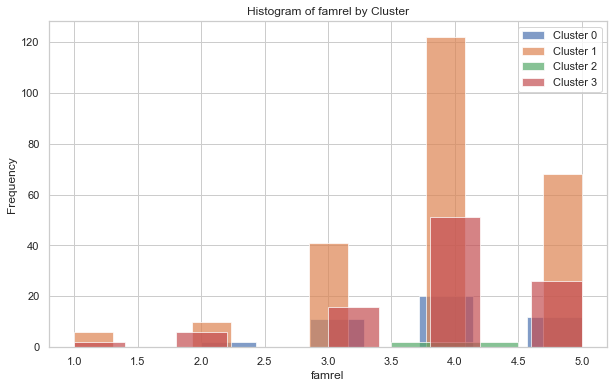

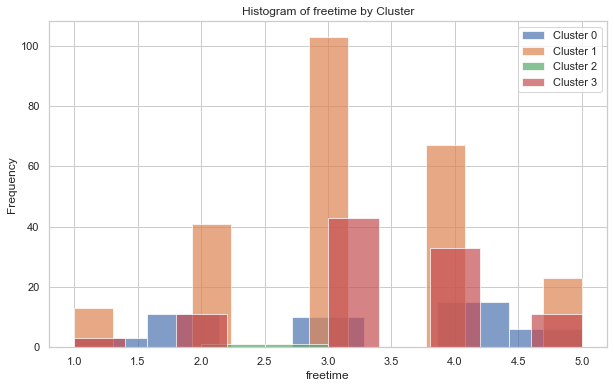

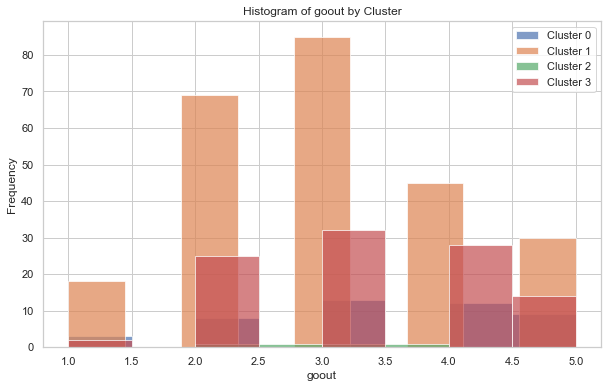

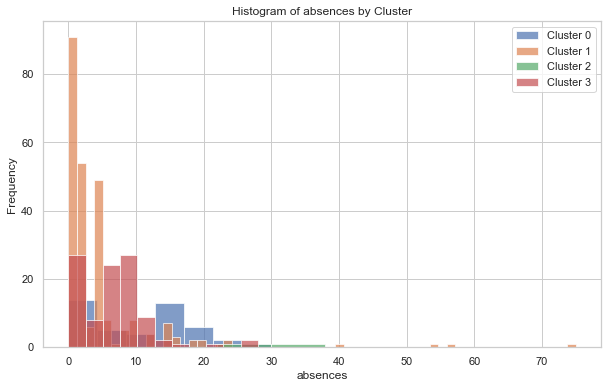

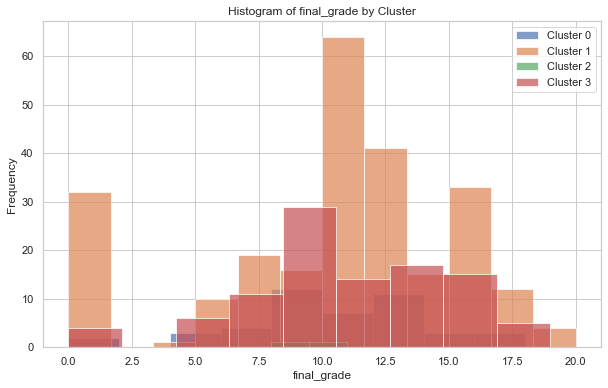

In [33]:
kmeans_model = KMeans(n_clusters=4, random_state=110)
cluster_labels = kmeans_model.fit_predict(X_raw)
cluster_labels_df = pd.Series(cluster_labels, name='Cluster')
# The new dataset contains the original dataset and the added clusters
students_with_clusters = original_data.join(cluster_labels_df, how='outer')  

# Create histograms for each variable, separated by cluster
for i in range(students_with_clusters.shape[1] - 1):
    col_name = students_with_clusters.columns[i]

    # Set the figure size for each variable
    plt.figure(figsize=(10, 6))

    # Group by 'Cluster'
    cluster_groups = students_with_clusters.groupby('Cluster')

    # Create subplots for each cluster
    for cluster, data in cluster_groups:
        plt.hist(data[col_name], bins='auto', alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for the entire plot
    plt.title(f'Histogram of {col_name} by Cluster')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot for each variable
    plt.show()

(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings. Do your findings support the claim that multiple categories of students, with distinctly different characteristics, are included in this dataset?

### Selecting Discriminatory Variables

Now that we have plotted the histograms grouped by clusters for each variable, let us try to figure out which variables are most discriminatory in separating these clusters from one another.<br>

Most of the variables have a tight distribution, with all the clusters converged together. However, there are some variables that provide slight distinction between the variables. <br>

1. **absences**
2. **goout**
3. **freetime**
4. **final grades**

We will plot scatter plots between these selected variables.

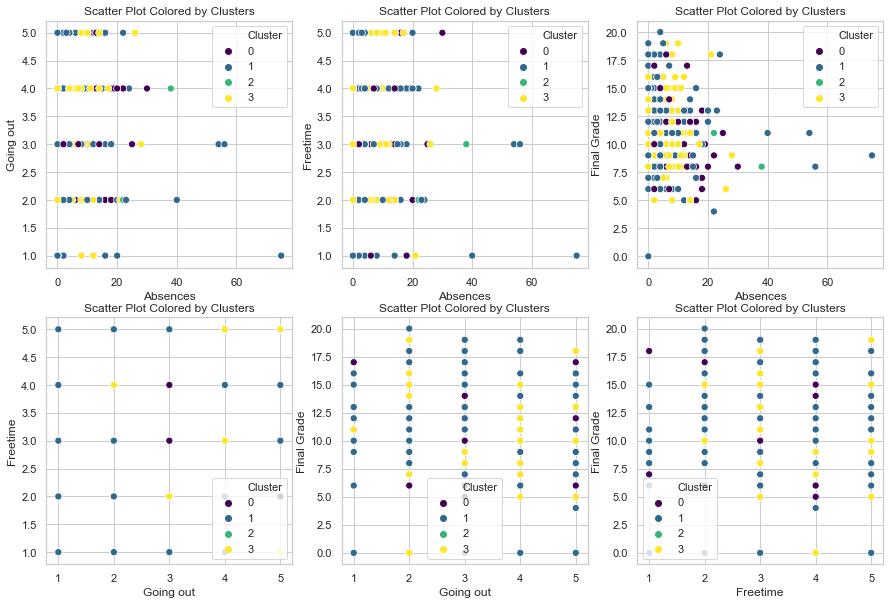

In [34]:
# absences
# goout
# freetime
# final_grade

plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.scatterplot(x='absences', y='goout', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Going out')

plt.subplot(2,3,2)
sns.scatterplot(x='absences', y='freetime', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Freetime')

plt.subplot(2,3,3)
sns.scatterplot(x='absences', y='final_grade', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Final Grade')

plt.subplot(2,3,4)
sns.scatterplot(x='goout', y='freetime', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Going out')
plt.ylabel('Freetime')

plt.subplot(2,3,5)
sns.scatterplot(x='goout', y='final_grade', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Going out')
plt.ylabel('Final Grade')

plt.subplot(2,3,6)
sns.scatterplot(x='freetime', y='final_grade', hue='Cluster', data=students_with_clusters, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Freetime')
plt.ylabel('Final Grade')

plt.show()

**Going Out vs Absences:**

The scatterplot illustrates the existence of distinct categories of students based on their "Going Out" levels. While clusters are noticeable at different degrees of social activity, they are tightly interwoven, making it imprudent to claim perfect separation. At various levels of going out, clusters are observable, but the boundaries between them are not distinctly defined. Outliers add complexity to the analysis, particularly at levels 1, 2, and 3.

**Freetime vs Absences:**

Similar to the previous plot, clusters emerge at different levels of "Freetime," indicating the presence of students with differing characteristics. However, these clusters overlap, preventing a clear visualization of distinct characteristics. Outliers further contribute to the variability, with notable instances at levels 1 and 3.

**Final Grade vs Absences:**

In this scatterplot, sizable groups of clusters are evident, hinting at potential relationships between final grades and absences. However, the clusters predominantly overlap, making it challenging to discern clear patterns. Outliers are visible within this complex distribution.

**Freetime vs Going Out:**

The scatterplot for "Freetime vs Going Out" presents challenges in identifying clear clusters. Data points are dispersed individually across the graph, with a faintly identifiable Cluster 1 at the bottom left. Due to the limited distribution, drawing conclusive insights about student categories from this graph proves difficult.

**Final Grade vs Going Out:**

Small clusters are discernible at different levels of "Going Out," suggesting varying characteristics among students. However, these distinctions are not highly pronounced, and the visualization indicates a moderate level of overlap among clusters. While not very distinct, subtle differences can still be observed.

**Final Grade vs Freetime:**

Similar to the "Final Grade vs Going Out" plot, small clusters emerge at different levels of "Freetime," implying diverse student characteristics. Although not highly distinct, there are subtle differences among clusters. The overlap suggests potential complexities in the relationships between final grades and free time.

**Conclusion**

In summary, the observed clusters across these scatterplots indicate the presence of students with different characteristics in the dataset. However, the lack of clear separation suggests potential intricacies in the relationships between the variables. These visualizations provide valuable insights but also highlight the need for further exploration and analysis to better understand the underlying patterns.

(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)-(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis. (See https://scikit-learn.org/stable/modules/clustering.html for an overview of other clustering algorithms.)

## Agllomerative Clustering

Let us look at Agglomerative Clustering for this dataset.

Agglomerative Clustering is a hierarchical clustering technique that initiates with each data point as an individual cluster and progressively merges the closest clusters until a specified stopping criterion is met. This process results in the creation of a hierarchical tree, known as a dendrogram, providing a visual representation of cluster relationships across different levels of granularity.

The fundamental steps in the agglomerative clustering algorithm are as follows:

**Initialization:**

Start with each data point forming a separate cluster.

**Compute Pairwise Distances:**

Calculate the distances between all clusters, considering each cluster as a single entity.

**Merge Closest Clusters:**

Identify the two clusters with the minimum distance and merge them into a new cluster.

**Update Distance Matrix:**

Recalculate distances between the newly formed cluster and all remaining clusters.

**Repeat:**

Iteratively repeat steps 3 and 4 until the desired number of clusters is attained or a predefined criterion is satisfied.

**Linkage Methods:**

Agglomerative clustering employs linkage criteria to determine the distance between clusters. Common linkage methods include:

Single Linkage: Minimum pairwise distance between points in two clusters.
Complete Linkage: Maximum pairwise distance between points in two clusters.
Average Linkage: Average pairwise distance between points in two clusters.
Ward's Method: Minimizes the increase in variance when merging clusters.

**Suitability for Different Datasets:**

Agglomerative clustering exhibits versatility and adaptability to various dataset types. Key considerations include:

**Cluster Shape:**

It excels when clusters are compact and convex, but may face challenges with elongated or non-convex clusters.

**Dataset Size:**

Effective for small to medium-sized datasets; large datasets may incur high computational costs.

**Distance Metric:**

Often effective with the Euclidean distance metric, although adjustments may be necessary for non-Euclidean metrics.

**Noise Handling:**

Capable of handling datasets with noise to some extent, leveraging hierarchical levels for noise filtering.

**Cluster Definition:**

Well-suited for situations where the number of clusters is undetermined or clusters lack clear boundaries.
While agglomerative clustering possesses inherent strengths, the choice of linkage method and distance metric significantly influences its effectiveness. Experimentation with different configurations is advised, considering the dataset's characteristics and analytical objectives.

**Silhouette Score**

The silhouette score is a metric used to assess the quality of clusters in agglomerative clustering. It measures how well-defined and separated the clusters are. The score ranges from -1 to 1, with higher values indicating better-defined clusters. For each data point, the silhouette score compares the average distance within its own cluster (a) to the average distance to the nearest neighboring cluster (b). The overall silhouette score is the average of these values across all data points. A score close to 1 suggests well-separated clusters, while a score around 0 indicates overlapping or ambiguous clusters. In agglomerative clustering, optimizing the number of clusters to maximize the silhouette score helps achieve meaningful and distinct clusters.

For n_clusters=2, the average silhouette_score is 0.5729123127682272
For n_clusters=3, the average silhouette_score is 0.5581350905250676
For n_clusters=4, the average silhouette_score is 0.2928201889303801
For n_clusters=5, the average silhouette_score is 0.2693036290662361
For n_clusters=6, the average silhouette_score is 0.2683305612193307
For n_clusters=7, the average silhouette_score is 0.2655990502302772
For n_clusters=8, the average silhouette_score is 0.20051065204087326
For n_clusters=9, the average silhouette_score is 0.20466340371198632
For n_clusters=10, the average silhouette_score is 0.1673918749892068


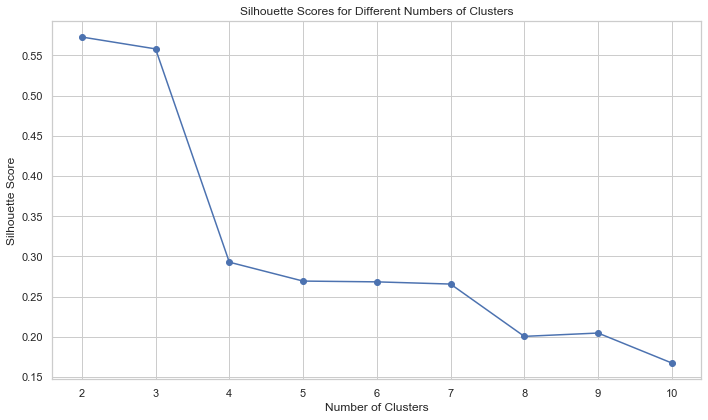

In [35]:
silhouette_scores = []
for i in range(2, 11):
    model = AgglomerativeClustering(n_clusters= i)
    cluster_labels = model.fit_predict(X_raw)
    silhouette_avg = silhouette_score(X_raw, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={i}, the average silhouette_score is {silhouette_avg}")
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [36]:
optimal_n_clusters = 2  

# Apply Agglomerative Clustering
agglomerative_model = AgglomerativeClustering(n_clusters=optimal_n_clusters)
cluster_labels_2 = agglomerative_model.fit_predict(X_raw)
cluster_labels_df_2 = pd.Series(cluster_labels_2, name = 'Cluster')

# Add the cluster labels to the original DataFrame
students_with_clusters_2 = original_data.join(cluster_labels_df_2, how = 'outer')

# View the distribution of samples in each cluster
print(students_with_clusters_2['Cluster'].value_counts())

# Analyze the characteristics of each cluster
cluster_means = students_with_clusters_2.groupby('Cluster').mean()
print(cluster_means)

1    459
0    123
Name: Cluster, dtype: int64
         large_family  lives_in_city  traveltime  studytime  failures  \
Cluster                                                                 
0            0.628205       0.858974    1.448718   2.102564  0.346154   
1            0.731861       0.757098    1.447950   2.018927  0.331230   

             paid  activities  internet  romantic    famrel  freetime  \
Cluster                                                                 
0        0.576923    0.551282  0.833333  0.435897  4.051282  3.294872   
1        0.429022    0.498423  0.832808  0.309148  3.917981  3.220820   

           goout  absences  final_grade  
Cluster                                  
0        3.24359  9.923077    10.384615  
1        3.07571  4.671924    10.422713  


#### Choosing the number of clusters based on Silhouette Score

Now that we have calculated the accuracy for different levels of clusters, we will look at 2 things<br>

1. **Highest Silhouette Score:** It can be observed from the plot above that the highest silhouette score is obtained for n = 2 clusters. 

2. **Equal Distribution:** If we look at the distribution of the proportion of data above for the 2 clusters in each variable, we can see that the proportion is same for almost all the variables, except for absences where there is a significant difference. There are slight differences in some other variables such as large_family, lives_in_city, paid, and activities, but other than that the data seems to be uniformy distributed.

Hence, we choose optimal clusters, n= 2.

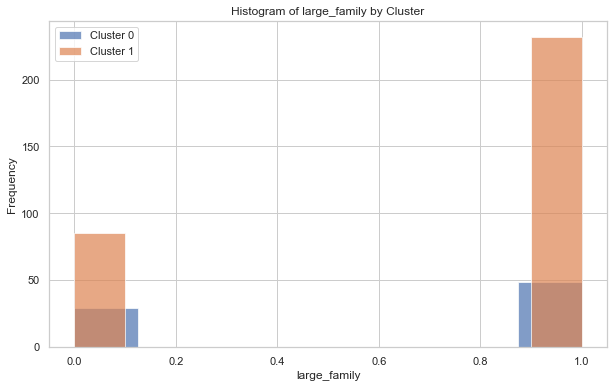

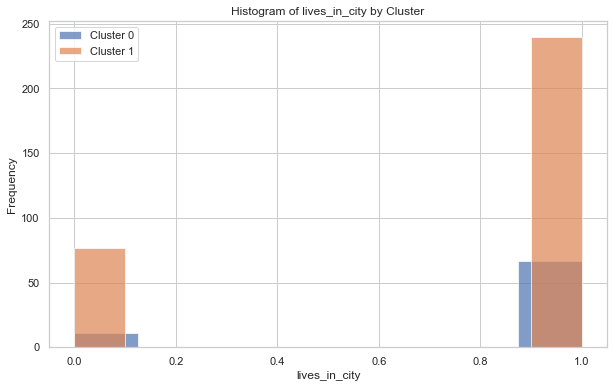

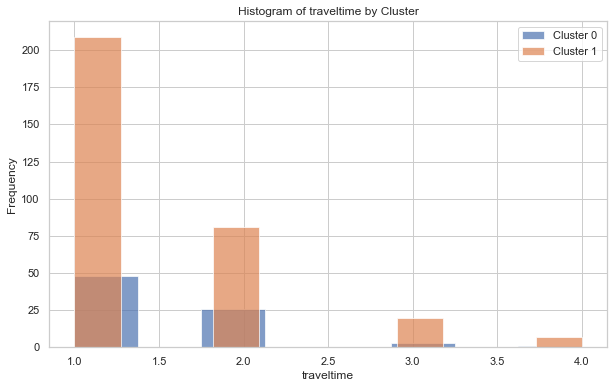

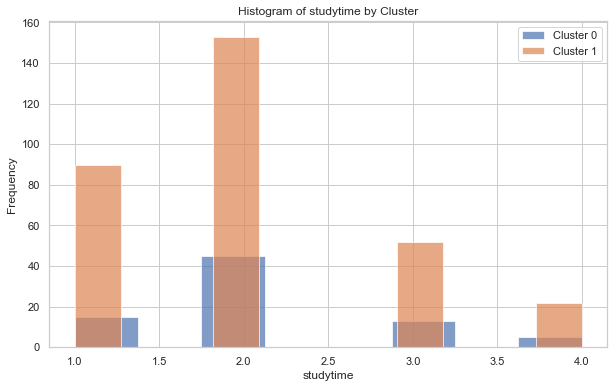

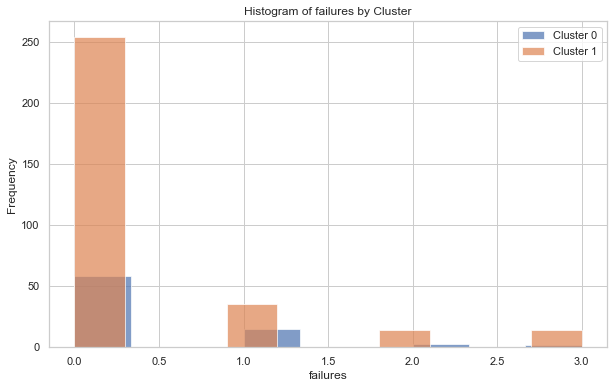

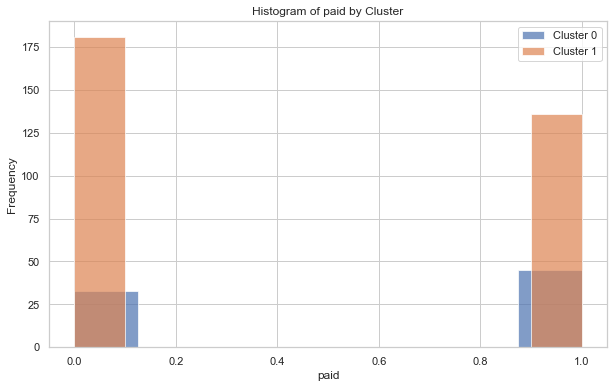

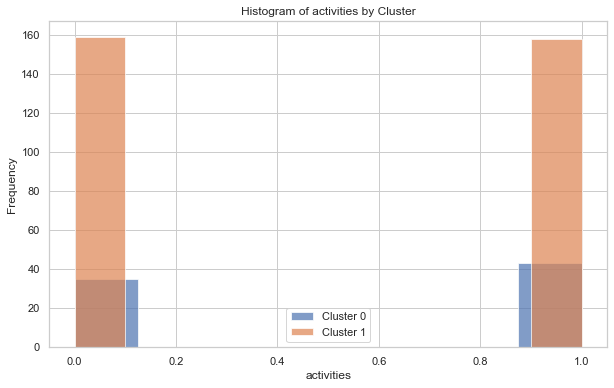

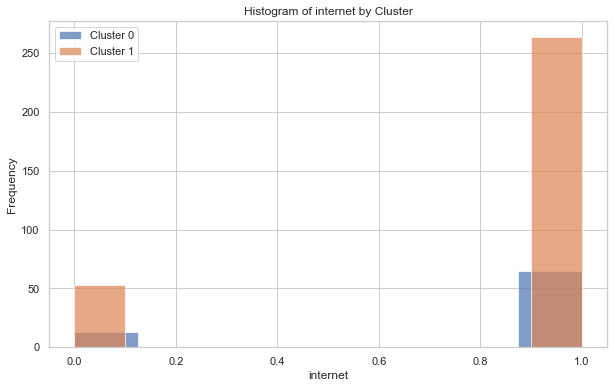

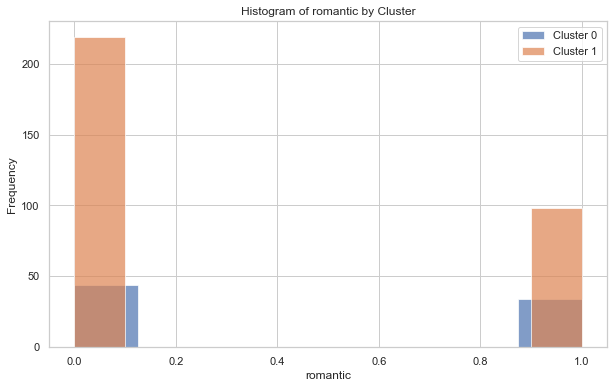

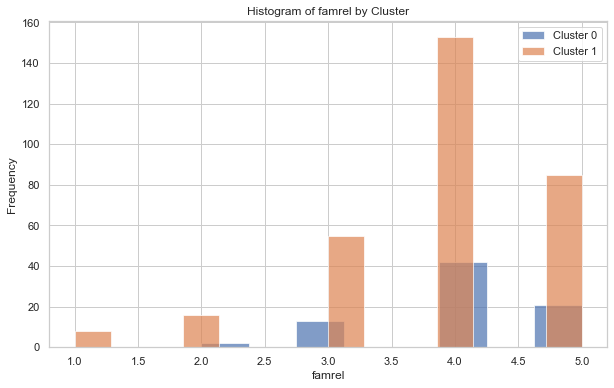

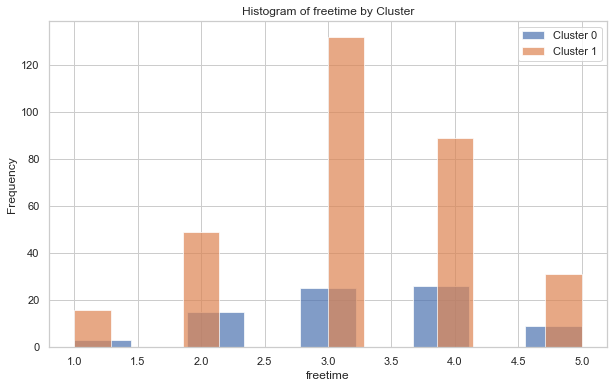

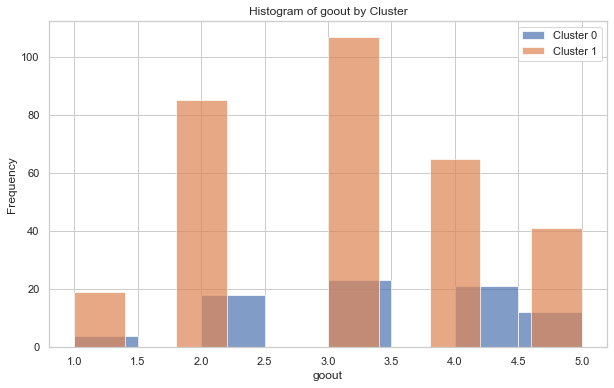

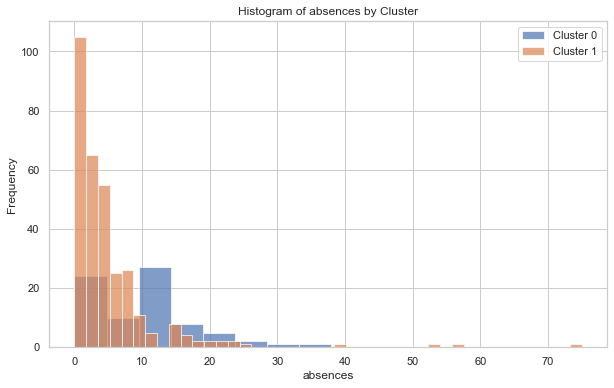

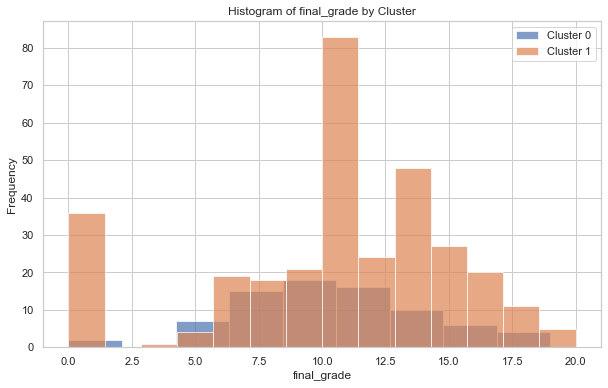

In [37]:
# Create histograms for each variable, separated by cluster
for i in range(students_with_clusters_2.shape[1] - 1):
    col_name = students_with_clusters_2.columns[i]

    # Set the figure size for each variable
    plt.figure(figsize=(10, 6))

    # Group by 'Cluster'
    cluster_groups = students_with_clusters_2.groupby('Cluster')

    # Create subplots for each cluster
    for cluster, data in cluster_groups:
        plt.hist(data[col_name], bins='auto', alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for the entire plot
    plt.title(f'Histogram of {col_name} by Cluster')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.legend()

    # Show the plot for each variable
    plt.show()

### Selecting Discriminatory Variables

Again let us try to figure out which variables are most discriminatory in separating these clusters from one another.<br>

Most of the variables have a tight distribution, with all the clusters converged together. However, there are some variables that provide slight distinction between the variables. <br>

1. **absences**
2. **goout**
3. **freetime**
4. **final grades**

We will plot scatter plots between these selected variables.

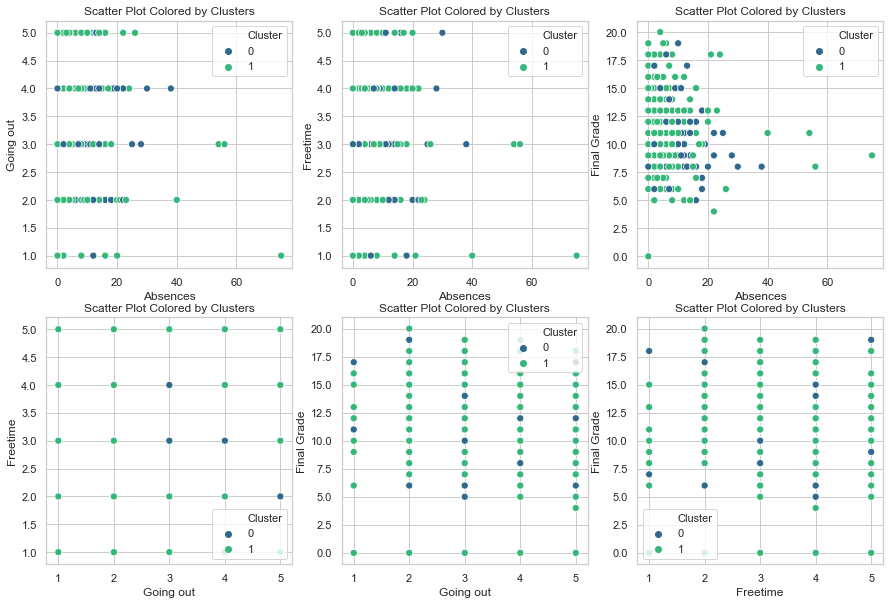

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.scatterplot(x='absences', y='goout', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Going out')

plt.subplot(2,3,2)
sns.scatterplot(x='absences', y='freetime', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Freetime')

plt.subplot(2,3,3)
sns.scatterplot(x='absences', y='final_grade', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Absences')
plt.ylabel('Final Grade')

plt.subplot(2,3,4)
sns.scatterplot(x='goout', y='freetime', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Going out')
plt.ylabel('Freetime')

plt.subplot(2,3,5)
sns.scatterplot(x='goout', y='final_grade', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Going out')
plt.ylabel('Final Grade')

plt.subplot(2,3,6)
sns.scatterplot(x='freetime', y='final_grade', hue='Cluster', data=students_with_clusters_2, palette='viridis', s=50)
plt.title('Scatter Plot Colored by Clusters')
plt.xlabel('Freetime')
plt.ylabel('Final Grade')

plt.show()

The presented graphs showcase more distinctly defined clusters compared to the previous case, and this improvement is attributed to a reduced number of clusters in the model. Despite the majority of the data appearing to lie in a single cluster, it is discernible that students with distinctly different characteristics are present in the dataset. The key observations from the graphs are as follows:

1. **Going Out vs Absences:**

The reduced number of clusters allows for a clearer identification of distinct characteristics at different levels of "Going Out." While some overlap is present, the clusters are more visually distinguishable. Outliers at levels 1, 2, and 3 provide additional insights into the variability within these clusters.

2. **Freetime vs Absences:**

With fewer clusters, there is a more apparent separation of characteristics at different levels of "Freetime." The reduced overlap facilitates the identification of distinct clusters. Outliers at levels 1 and 3 contribute to a better understanding of the variability within these clusters.

3. **Final Grade vs Absences:**

Despite the predominantly overlapping nature of clusters, the reduced cluster count aids in identifying patterns between final grades and absences. The distinctiveness of clusters is improved, providing a more interpretable representation of student characteristics.

4. **Freetime vs Going Out:**

The scatterplot displays a clearer formation of clusters, with data points distributed in a way that allows for easier identification. The presence of Cluster 1 at the bottom left is more evident, contributing to a better understanding of the relationships between "Freetime" and "Going Out."

5. **Final Grade vs Going Out:**

Although some overlap exists, the reduced number of clusters aids in distinguishing characteristics at different levels of "Going Out." Small clusters are visible, indicating variations in student characteristics. The visualization allows for a more nuanced interpretation.

6. **Final Grade vs Freetime:**

Similar to the "Final Grade vs Going Out" plot, the reduced number of clusters enhances the visualization of distinct characteristics at different levels of "Freetime." Subtle differences among clusters are more apparent, facilitating a more refined analysis.

In conclusion, the decision to reduce the number of clusters has notably improved the interpretability of the visualizations. The clearer identification of distinct clusters enhances our understanding of student characteristics, and the reduced overlap contributes to a more refined analysis of the relationships between variables. This nuanced perspective provides valuable insights for further exploration and decision-making in subsequent stages of data analysis and modeling.